In [1]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
import seaborn as sns
matplotlib.use("nbagg")
%matplotlib inline

In [3]:
data = load_boston()
X = data.data
Y = data.target
col_names = data.feature_names

In [4]:
X.shape

(506, 13)

In [5]:
housing_data = pd.DataFrame(X, columns=col_names)
housing_data['Target'] = Y

In [6]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
with open("./descr.txt", 'w') as f:
    f.write(data.DESCR)
    f.close()

In [7]:
np.corrcoef(housing_data['CRIM'], housing_data['Target'])[0][1]

-0.3883046085868115

In [8]:
## select highly correlated variables most negative correlated and positive correlated
## positve &gte > 0.5, negative &lte < -0.5
from typing import Iterable

crit = []

def obtain_required_rows(target_col: str, regressors: str)-> Iterable[str]:
    cor_coef = np.corrcoef(x=housing_data[regressors], y=housing_data[target_col])
    if np.round(cor_coef[0][1], 1) >= 0.5 or cor_coef[0][1] <= -0.5:
        crit.append(regressors)
    return crit

for x in col_names:
    obtain_required_rows('Target',x)
    
crit

['RM', 'PTRATIO', 'LSTAT']

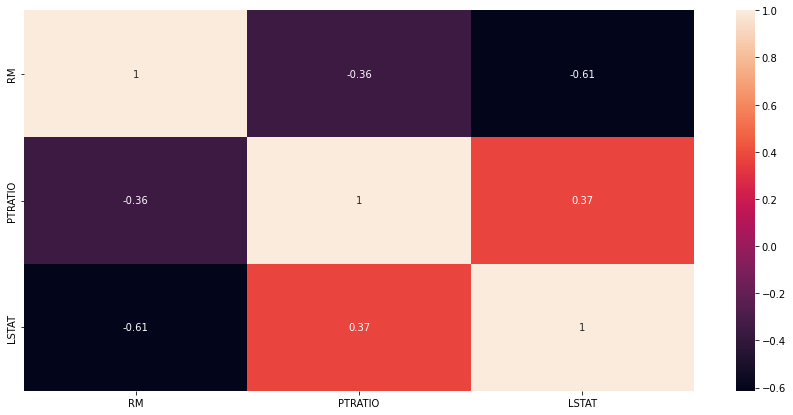

In [9]:
plt.figure(figsize=(15, 7))
sns.heatmap(housing_data[crit].corr(), annot=True)
plt.show()

In [10]:
regressors = housing_data[crit]
predictor = housing_data['Target']

In [11]:
regressors.shape, predictor.shape

((506, 3), (506,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(regressors, predictor,test_size=0.3, random_state=42)

In [13]:
Y_train.shape

(354,)

In [14]:
X_train.shape

(354, 3)

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_predict = model.predict(X_test)
Y_predict.shape

(152,)

In [17]:
print("Multiple R-square: %f"%r2_score(Y_test, Y_predict))
print("Intercept: %f"%model.intercept_)
print("Rank: %f"%model.rank_)

Multiple R-square: 0.650904
Intercept: 18.119085
Rank: 3.000000


In [20]:
dat = pd.DataFrame({'Coefficients': model.coef_})
dat.index = crit
dat

,Coefficients
RM,4.461626
PTRATIO,-0.862905
LSTAT,-0.608150


#### Interpretation of the Results
$$
Y = \beta + B_1X_1 + B_2X_2 + B_3X_3 + \epsilon
$$

$$
where: \\
X_1 = RM (average number of rooms per dwelling)\\
X_2 = PTRATIO (pupil-teacher ratio by town)\\
X_3 = LSTAT (lower status of the population)
$$

$$
Y = 18.119085 + 4.461626 X_1 - 0.862905 X_2 - 0.608150 X_3
$$

For every Increase in one unit of Average number of rooms per dwelling results to 4.461626 increase in the House Price in boston

For every Increase in one unit of pupil-teacher ratio by town results to 0.862905 decrease in the House Price in boston

For every Increase in one unit of lower status of the population results to 0.608150 decrease in the House Price in boston

In [18]:
model.score(X_train, Y_train)

0.6850018441906279

In [19]:
model._residues

9801.284612238913

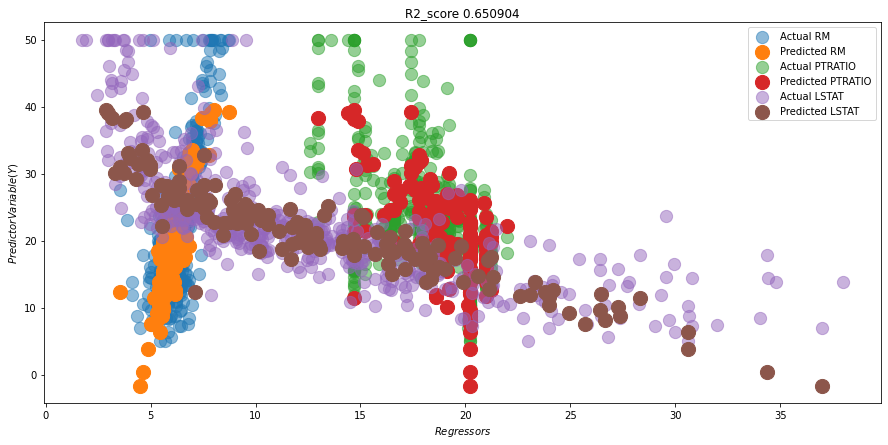

In [20]:
def plot_vars():
    figure, axis = plt.subplots(figsize=(15,7))
    for items in crit:
        axis.scatter(housing_data[items], housing_data['Target'], alpha=0.5, label="Actual %s"%items, s=150)
        axis.scatter(X_test[items], Y_predict, label="Predicted %s"%items, s=200)
    plt.title("R2_score %f"%r2_score(Y_test, Y_predict))
    plt.legend()
    axis.set_ylabel("$Predictor Variable (Y)$")
    axis.set_xlabel("$Regressors$")
    plt.show()

plot_vars()

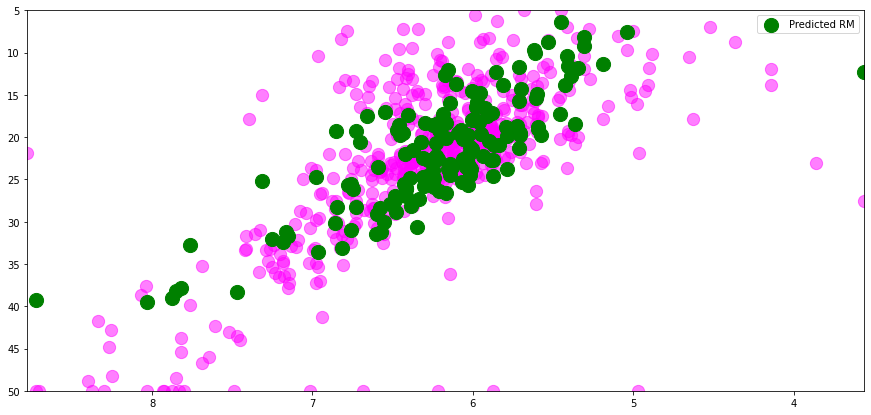

In [22]:
## Select by range
def select(column_name):
    fig, ax = plt.subplots(figsize=(15, 7))
    plt.axis([regressors[column_name].max(), regressors[column_name].min(), predictor.max(),\
             predictor.min()])
    ax.scatter(regressors[column_name], predictor, s=150, alpha=0.5,c="magenta")
    ax.scatter(X_test[column_name], Y_predict, label="Predicted %s"%column_name, s=200,c="green")
    plt.legend()
    plt.show()

select('RM')

#### Plot The Decision Regions for the regression Model

In [49]:
pallate = sns.color_palette('plasma_r', 20)
cmap = LinearSegmentedColormap.from_list('plasma', pallate)
x_min, x_max = regressors.to_numpy().min() - 1, regressors.to_numpy().max() + 1
y_min, y_max = predictor.min()-1, predictor.max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))